# Using Tensorboard

This lab builds on previous lab.  
**Step 3** on has the extra steps.

## Step 1 : Tips Data

Our tips data looks like this

```
| bill | tip | 
|------|-----| 
| 50   | 12  | 
| 30   | 7   | 
| 60   | 13  | 
| 40   | 8   | 
| 65   | 15  | 
| 20   | 5   | 
| 10   | 2   | 
| 15   | 2   | 
| 25   | 3   | 
| 35   | 4   | 
```

In [5]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
## Create some tips data in pandas

tip_data = pd.DataFrame({'bill' : [50.00, 30.00, 60.00, 40.00, 65.00, 20.00, 10.00, 15.00, 25.00, 35.00],
              'tip' : [12.00, 7.00, 13.00, 8.00, 15.00, 5.00, 2.00, 2.00, 3.00, 4.00]
             })

# print(tip_data)
x = tip_data['bill'].values
y = tip_data['tip'].values
print('bill = ' + str(x))
print('tip = ' + str(y))

bill = [50. 30. 60. 40. 65. 20. 10. 15. 25. 35.]
tip = [12.  7. 13.  8. 15.  5.  2.  2.  3.  4.]


## Step 2 : Define a Simple Linear Model


In [7]:
import tensorflow as tf
from tensorflow import keras  # using TF.Keras !

model = tf.keras.Sequential()
model.add (keras.layers.Dense(units=1, input_shape=[1]))

# optimizer=tf.keras.optimizers.Adam(0.01)
optimizer=tf.keras.optimizers.RMSprop(0.01)


model.compile(optimizer=optimizer, loss='mean_squared_error', 
             metrics=[ 'mse', 'mae'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


## Step 3 : Setup Tensorboard Integration

In our docker image tensorboard is monitoring `/tmp/tensorboard-logs` directory

In [8]:
## This is fairly boiler plate code

import datetime
import os

app_name = 'tensorboard-intro' # you can change this, if you like

tb_top_level_dir= '/tmp/tensorboard-logs'
tensorboard_logs_dir= os.path.join (tb_top_level_dir, app_name, 
                                    datetime.datetime.now().strftime("%Y-%m-%d--%H-%M-%S"))
print ("Saving TB logs to : " , tensorboard_logs_dir)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=tensorboard_logs_dir, histogram_freq=1)

# Loading of tensorboard in Colab
%load_ext tensorboard
%tensorboard --logdir $tb_top_level_dir

Saving TB logs to :  /tmp/tensorboard-logs/tensorboard-intro/2020-10-28--18-57-34


## Step 3 : Train The Neural Network
Here we supply our tensorboard as a callback hook

In [9]:
%%time

history = model.fit (x,y, epochs=100, verbose=2, 
                    callbacks=[tensorboard_callback])

Epoch 1/100
1/1 - 0s - loss: 103.7537 - mse: 103.7537 - mae: 9.2692
Epoch 2/100
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1/1 - 0s - loss: 79.7809 - mse: 79.7809 - mae: 8.1308
Epoch 3/100
1/1 - 0s - loss: 65.3684 - mse: 65.3684 - mae: 7.3594
Epoch 4/100
1/1 - 0s - loss: 54.9096 - mse: 54.9096 - mae: 6.7427
Epoch 5/100
1/1 - 0s - loss: 46.7288 - mse: 46.7288 - mae: 6.2162
Epoch 6/100
1/1 - 0s - loss: 40.0698 - mse: 40.0698 - mae: 5.7506
Epoch 7/100
1/1 - 0s - loss: 34.5174 - mse: 34.5174 - mae: 5.3300
Epoch 8/100
1/1 - 0s - loss: 29.8158 - mse: 29.8158 - mae: 4.9447
Epoch 9/100
1/1 - 0s - loss: 25.7937 - mse: 25.7937 - mae: 4.5880
Epoch 10/100
1/1 - 0s - loss: 22.3300 - mse: 22.3300 - mae: 4.2557
Epoch 11/100
1/1 - 0s - loss: 19.3349 - mse: 19.3349 - mae: 3.9444
Epoch 12/100
1/1 - 0s - loss: 16.7393 - mse: 16.7393 - mae: 3.6518
Epoch 13/100
1/1 - 0s - loss: 14.4884 - mse: 14.4884 - mae: 3.3761
Epoch 14/100
1/1 - 0s - loss: 12.5378 - mse: 12.5378 - mae: 3.11

## Step 4 : Predict 
Now that our model is ready, lets predict tip for $100.  

**==> Q : How good is our neural network tip calculator? :-)**

In [10]:
predicted = model.predict([100.])
print ("predicted tip : ", predicted)

predicted tip :  [[21.739254]]


## Step 5 : Inspect Tensorboard
- Tensorboard port is [6006](http://:6006).  
- You will find a link to Tensorboard from the landing page.  
- Goto tensorboard dashboard
- 'Refresh' to see the latest run  (on the left side)
- Select the most latest run on left pane to see the metrics

## Step 6 : Do a few runs and inspect Tensorboard
You can compare metrics from a few runs in Tensorboard

## Step 7 : See the Training Metrics Graph
We can still see the `history` of training

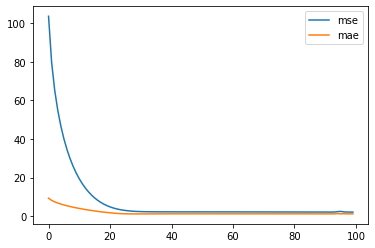

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['mae'], label='mae')
plt.legend()
plt.show()

## Discussion

- How many iterations does it take to converge?
- Try different optimizers from previous lab and evaluate how quickly they converge


### Good reads:
- https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/